# 사이킷런을 이용한 모델의 훈련과 실행
* 선형 모델
* kNN 모델

### 0. 설정

* matplotlib으로 그린 그림이 노트북 안에 포함되도록 설정.
* 생성한 그림을 저장.

In [1]:
import os
datapath = os.path.join("data", "handson-ml", "lifesat", "")

In [2]:
# 파이썬 2, 파이썬 3 지원.
from __future__ import division, print_function, unicode_literals

# 공통
import numpy as np
import os

# 일관된 출력을 위한 random seed 설정
np.random.seed(42)

# matplotlib 설정
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# 한글출력
matplotlib.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

# 그림을 저장할 폴드
PROJECT_ROOT_DIR = datapath
CHAPTER_ID = "fundamentals"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# SciPy 이슈 #5998에 해당하는 경고를 무시합니다(https://github.com/scipy/scipy/issues/5998).
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

## 예제 1-1

* 1인당 GDP와 삶의 만족도 간 어떤 관계가 있는지 알아본다.
* 책에서는 2015년 데이터를 사용했으나, 개인적으로 실습을 진행하면서는 2017년 데이터를 사용한다.
    - OECD 삶의 만족도 : https://stats.oecd.org/Index.aspx?DataSetCode=BLI
    - IMF 1인당 GDP : https://www.imf.org/external/pubs/ft/weo/2017/02/weodata/index.aspx

### 선형 모델 사용

In [3]:
# module import
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
import sklearn.neighbors

#### read_csv 주의사항
> notepad로 raw data 열어보고 확인해야 한다.
* thousands : 천 단위 구분기호
* delimiter : 책의 파일에서는 구분자가 tab이었지만, 내가 저장한 파일에서 구분자는 comma이다.
* encoding : 책에서는 'latin1'로 했는데, 내가 저장한 파일에서는 UTF-8이었다.


In [4]:
# load data and examine
oecd_bli = pd.read_csv(datapath + "oecd_bli_2017.csv",
                       thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita_2017.csv",
                             thousands=',',
                             delimiter=',',
                             encoding='UTF-8',
                             na_values="n/a"
                             )
display(oecd_bli)
display(gdp_per_capita)

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,5.40,NaN,NaN
1,AUT,Austria,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.50,NaN,NaN
2,BEL,Belgium,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.70,NaN,NaN
3,CAN,Canada,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,6.00,NaN,NaN
4,CZE,Czech Republic,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.10,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2364,LTU,Lithuania,WL_EWLH,Employees working very long hours,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,0.54,NaN,NaN
2365,COL,Colombia,WL_EWLH,Employees working very long hours,L,Value,MN,Men,PC,Percentage,0,Units,NaN,NaN,32.09,NaN,NaN
2366,LTU,Lithuania,WL_EWLH,Employees working very long hours,L,Value,MN,Men,PC,Percentage,0,Units,NaN,NaN,0.67,NaN,NaN
2367,COL,Colombia,WL_EWLH,Employees working very long hours,L,Value,WMN,Women,PC,Percentage,0,Units,NaN,NaN,19.37,NaN,NaN


,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2017,Estimates Start After
0,Afghanistan,"Gross domestic product, current prices",U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",21.056,2015.0
1,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",572.163,2013.0
2,Albania,"Gross domestic product, current prices",U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",13.001,2016.0
3,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4520.270,2011.0
4,Algeria,"Gross domestic product, current prices",U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",175.493,2016.0
...,...,...,...,...,...,...,...
383,Zambia,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",1483.690,2010.0
384,Zimbabwe,"Gross domestic product, current prices",U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",17.105,2013.0
385,Zimbabwe,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",1149.720,2012.0
386,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### life satisfaction data와 gdp per capita data 합치기
> 위에서 load한 data의 구조를 확인해야 한다.
* oecd_bli data
    - 1) inequality : 남자, 여자로 나눈 게 아니라 TOTAL 필요함.
    - 2) 나라 이름, value 필요함.
    - 3) 나중에 합칠 때 country 기준으로 합치므로, index를 country로 지정.
* gdp_per_capita data
    - 1) 2017 column이 1인당 GDP 나타내므로, 이름 바꾸기.
    - 2) index를 country로 지정.
* remove_indices : 이후에 그림 1-21에서처럼 누락된 데이터를 넣어줬을 때 변화를 관찰하기 위한 것.
    - 데이터 뜯어보면서 비슷한 삶의 만족도인데 1인당 GDP가 다른 나라들로 바꿔주어야 함.
    - 아래 셀에서 수작업을 통해 일단 지우고 진행할 나라 8개 선정.

* 책의 코드에서는 gdp_per_capita가 units로 측정된 것만 불러오는 코드 없었음.
* `inplace = True` 옵션 있기 때문에, 한 번만 진행해야 함.

In [5]:
# 합치는 작업을 진행하는 함수.
# remove_indices 추후에 확인하고 반영한 것.

def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    
    gdp_per_capita = gdp_per_capita[gdp_per_capita["Scale"]=="Units"] # 책의 코드에서 추가
    gdp_per_capita.rename(columns={"2017": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [2, 8, 14, 21, 22, 25, 34, 39]
    keep_indices = list(set(range(40)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [6]:
# prepare data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
country_stats

C:\Users\user\Anaconda3\envs\cpu_env\lib\site-packages\pandas\core\frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,GDP per capita,Life satisfaction
Country,,
South Africa,6089.22,4.7
Colombia,6237.59,6.3
Brazil,10019.79,6.4
Russia,10248.24,5.8
Turkey,10434.02,5.5
Poland,13429.41,6.1
Hungary,13459.73,5.6
Latvia,15402.66,5.9
Lithuania,16443.21,5.9


In [7]:
# GDP per capita, Life satisfaction 2차원 numpy array로 만들기
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

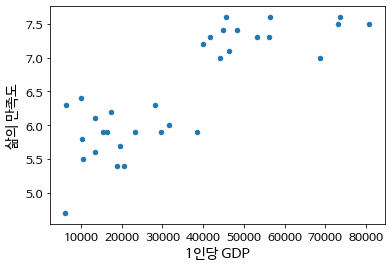

In [8]:
# data visualization
ax = country_stats.plot(kind="scatter", x="GDP per capita", y='Life satisfaction')
ax.set(xlabel="1인당 GDP", ylabel="삶의 만족도")
plt.show()

In [13]:
# linear regression model
lr_model = sklearn.linear_model.LinearRegression()

In [15]:
# train model
lr_model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
# 새로운 나라(알제리아)에 대한 예측
X_Algeria = [[4225]]
print(lr_model.predict(X_Algeria))

[[5.51711987]]


### K-최근접 이웃 모델

In [17]:
# k-최근접 이웃 회귀 모델
knn_model = sklearn.neighbors.KNeighborsRegressor(n_neighbors = 3)

# 모델 훈련
knn_model.fit(X, y)

# 알제리아 예측
print(knn_model.predict(X_Algeria))

[[5.8]]


### 선형 모델에서 누락된 데이터 추가할 경우

In [18]:
# load and prepare data : 삶의 만족도 지수
oecd_bli = pd.read_csv(datapath + "oecd_bli_2017.csv",
                       thousands=',')
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
oecd_bli.head(2)

Indicator,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,5.0,NaN,81.0,13.04,73.0,63.5,1.1,32759.0,427064.0,20.0,...,49126.0,95.0,NaN,85.0,2.7,502.0,14.35,91.0,93.0,21.0
Austria,16.0,0.9,85.0,6.66,72.0,80.6,0.5,33541.0,308325.0,21.0,...,50349.0,92.0,1.6,70.0,1.3,492.0,14.55,80.0,92.0,17.0


In [19]:
# load and prepare data : 1인당 GDP

gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita_2017.csv",
                             thousands=',',
                             delimiter=',',
                             encoding='UTF-8',
                             na_values="n/a"
                             )
gdp_per_capita = gdp_per_capita[gdp_per_capita["Scale"]=="Units"] # 책의 코드에서 추가
gdp_per_capita.rename(columns={"2017": "GDP per capita"}, inplace=True)
gdp_per_capita.set_index("Country", inplace=True)
gdp_per_capita.head(2)

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",572.163,2013.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4520.270,2011.0


In [20]:
# merge data frames
full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)
full_country_stats.sort_values(by="GDP per capita", inplace=True)
full_country_stats

,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,...,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,
South Africa,22.0,37.0,73.0,18.12,43.0,36.1,13.7,NaN,NaN,18.0,...,14.92,73.0,67.0,NaN,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",6089.22,2016.0
Colombia,10.0,23.9,54.0,26.56,67.0,44.4,24.5,NaN,NaN,17.0,...,NaN,53.0,75.0,14.1,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",6237.59,2015.0
Mexico,16.0,25.5,38.0,28.70,61.0,41.8,18.1,NaN,NaN,20.0,...,NaN,63.0,68.0,15.2,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9249.27,2015.0
Brazil,10.0,6.7,49.0,7.13,61.0,35.6,26.7,NaN,NaN,NaN,...,NaN,79.0,73.0,16.2,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",10019.79,2016.0
Russia,15.0,14.8,94.0,0.14,70.0,52.8,9.6,NaN,NaN,18.0,...,NaN,68.0,55.0,16.2,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",10248.24,2016.0
Turkey,20.0,8.0,39.0,32.64,52.0,59.8,1.4,NaN,NaN,20.0,...,14.79,86.0,65.0,18.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",10434.02,2016.0
Poland,22.0,3.0,92.0,5.95,66.0,67.3,0.7,19814.0,210991.0,22.0,...,14.42,55.0,82.0,17.6,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",13429.41,2015.0
Hungary,19.0,4.7,84.0,3.03,68.0,56.3,1.0,NaN,104458.0,19.0,...,NaN,70.0,77.0,16.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",13459.73,2015.0
Chile,16.0,9.4,65.0,9.72,63.0,47.9,4.2,NaN,100967.0,18.0,...,NaN,47.0,71.0,17.5,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14314.75,2015.0


In [21]:
remove_indices = [2, 8, 14, 21, 22, 25, 34, 39]
keep_indices = list(set(range(40)) - set(remove_indices))

sample_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]
missing_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[remove_indices]

In [22]:
full_country_stats[["GDP per capita", 'Life satisfaction']]

,GDP per capita,Life satisfaction
Country,,
South Africa,6089.22,4.7
Colombia,6237.59,6.3
Mexico,9249.27,6.5
Brazil,10019.79,6.4
Russia,10248.24,5.8
Turkey,10434.02,5.5
Poland,13429.41,6.1
Hungary,13459.73,5.6
Chile,14314.75,6.5


In [24]:
sample_data

,GDP per capita,Life satisfaction
Country,,
South Africa,6089.22,4.7
Colombia,6237.59,6.3
Brazil,10019.79,6.4
Russia,10248.24,5.8
Turkey,10434.02,5.5
Poland,13429.41,6.1
Hungary,13459.73,5.6
Latvia,15402.66,5.9
Lithuania,16443.21,5.9


In [25]:
missing_data

,GDP per capita,Life satisfaction
Country,,
Mexico,9249.27,6.5
Chile,14314.75,6.5
Czech Republic,19818.36,6.7
United Kingdom,38846.79,6.8
France,39673.14,6.5
Belgium,43243.30,6.9
United States,59495.34,6.9
Luxembourg,107708.22,6.9


## 아래는 code inspection을 위해 확인하면서 진행한 내용입니다.

### 1) pivot 진행 결과
* 원래 csv 파일에 indicator 부분에 Air pollution 등 여러 가지 항목 들어 있었다. 그 항목이 column으로 간다.
* prepare_country_stats 함수에서는 이 중에서 Life satisfaction만 뽑아 쓴 것.

In [9]:
oecd_bli_test = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"] # boolean mask
oecd_bli_test = oecd_bli_test.pivot(index="Country", columns="Indicator", values="Value")
display(oecd_bli_test)
display(oecd_bli_test["Life satisfaction"]) # nan 없음.

Indicator,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,5.0,NaN,81.0,13.04,73.0,63.5,1.1,32759.0,427064.0,20.0,...,49126.0,95.0,NaN,85.0,2.7,502.0,14.35,91.0,93.0,21.0
Austria,16.0,0.9,85.0,6.66,72.0,80.6,0.5,33541.0,308325.0,21.0,...,50349.0,92.0,1.6,70.0,1.3,492.0,14.55,80.0,92.0,17.0
Belgium,15.0,1.9,77.0,4.75,63.0,70.1,1.0,30364.0,386006.0,21.0,...,49675.0,91.0,2.2,74.0,2.0,503.0,15.70,89.0,84.0,19.3
Brazil,10.0,6.7,49.0,7.13,61.0,35.6,26.7,NaN,NaN,NaN,...,NaN,90.0,NaN,NaN,2.2,395.0,NaN,79.0,73.0,16.2
Canada,7.0,0.2,91.0,3.69,73.0,82.2,1.3,30854.0,423849.0,22.0,...,47622.0,93.0,2.6,88.0,2.9,523.0,14.56,68.0,91.0,17.3
Chile,16.0,9.4,65.0,9.72,63.0,47.9,4.2,NaN,100967.0,18.0,...,25879.0,85.0,1.2,57.0,1.3,443.0,NaN,47.0,71.0,17.5
Colombia,10.0,23.9,54.0,26.56,67.0,44.4,24.5,NaN,NaN,17.0,...,NaN,89.0,1.2,NaN,1.4,410.0,NaN,53.0,75.0,14.1
Czech Republic,20.0,0.7,94.0,5.65,74.0,72.3,0.5,21453.0,NaN,24.0,...,25372.0,91.0,1.4,60.0,1.6,491.0,NaN,61.0,87.0,17.9
Denmark,9.0,0.5,81.0,2.34,74.0,83.5,0.6,29606.0,118637.0,23.0,...,51466.0,95.0,1.9,71.0,2.0,504.0,15.87,86.0,95.0,19.5


Country
Australia          7.3
Austria            7.1
Belgium            6.9
Brazil             6.4
Canada             7.4
Chile              6.5
Colombia           6.3
Czech Republic     6.7
Denmark            7.6
Estonia            5.7
Finland            7.6
France             6.5
Germany            7.0
Greece             5.4
Hungary            5.6
Iceland            7.5
Ireland            7.0
Israel             7.2
Italy              6.0
Japan              5.9
Korea              5.9
Latvia             5.9
Lithuania          5.9
Luxembourg         6.9
Mexico             6.5
Netherlands        7.4
New Zealand        7.3
Norway             7.6
OECD - Total       6.5
Poland             6.1
Portugal           5.4
Russia             5.8
Slovak Republic    6.2
Slovenia           5.9
South Africa       4.7
Spain              6.3
Sweden             7.3
Switzerland        7.5
Turkey             5.5
United Kingdom     6.8
United States      6.9
Name: Life satisfaction, dtype: float64

### 2) gdp_per_capita
* scale이 billions와 units 다 나오는 문제가 있는데..?

In [10]:
gdp_per_capita_test = gdp_per_capita.rename(columns={"2017": "GDP per capita"})
gdp_per_capita_test.set_index("Country", inplace=True)
display(gdp_per_capita_test)

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,
Afghanistan,"Gross domestic product, current prices",U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",21.056,2015.0
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",572.163,2013.0
Albania,"Gross domestic product, current prices",U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",13.001,2016.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4520.270,2011.0
Algeria,"Gross domestic product, current prices",U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",175.493,2016.0
...,...,...,...,...,...,...
Zambia,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",1483.690,2010.0
Zimbabwe,"Gross domestic product, current prices",U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",17.105,2013.0
Zimbabwe,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",1149.720,2012.0


### 3) full_country_stats로 merge
* 어차피 scale에 따라서 알아서 merge되므로 신경쓰지 않아도 된다.

In [11]:
full_country_stats_test = pd.merge(left=oecd_bli_test, right=gdp_per_capita_test,
                                  left_index=True, right_index=True)
full_country_stats_test.sort_values(by="GDP per capita", inplace=True)
display(full_country_stats_test)

,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,...,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,
Iceland,3.0,0.0,77.0,15.06,86.0,86.0,0.5,NaN,NaN,24.0,...,NaN,79.0,99.0,19.0,"Gross domestic product, current prices",U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",24.848,2016.0
Estonia,8.0,7.0,89.0,2.42,74.0,69.0,3.1,19697.0,159373.0,17.0,...,14.90,64.0,84.0,17.7,"Gross domestic product, current prices",U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",25.683,2016.0
Latvia,11.0,13.9,88.0,1.27,70.0,62.4,4.8,16275.0,70160.0,23.0,...,13.83,59.0,79.0,18.0,"Gross domestic product, current prices",U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",30.176,2016.0
Lithuania,14.0,13.6,93.0,0.54,70.0,55.9,3.4,21660.0,NaN,19.0,...,NaN,51.0,81.0,18.4,"Gross domestic product, current prices",U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",46.666,2016.0
Slovenia,16.0,0.4,88.0,4.39,69.0,86.1,0.6,20820.0,203044.0,18.0,...,14.75,53.0,90.0,18.3,"Gross domestic product, current prices",U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",48.078,2016.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ireland,7.0,1.0,82.0,5.25,67.0,75.9,0.7,25310.0,217130.0,20.0,...,NaN,65.0,85.0,18.1,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",68604.380,2016.0
Iceland,3.0,0.0,77.0,15.06,86.0,86.0,0.5,NaN,NaN,24.0,...,NaN,79.0,99.0,19.0,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",73092.200,2016.0
Norway,5.0,0.0,82.0,2.93,74.0,90.1,0.4,35725.0,228936.0,17.0,...,15.56,78.0,98.0,18.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",73615.150,2016.0


### 4) 무시해야 하는 index
* 데이터 뜯어보고, 비슷한 삶의 만족도인데 다른 1인당 GDP를 갖는 나라들을 찾아야 함. 7개 정도 찾자.
* remove_indices = 

,GDP per capita,Life satisfaction
Country,,


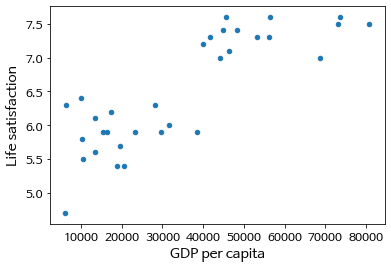

In [12]:
country_stats.plot(kind="scatter", x="GDP per capita", y="Life satisfaction")
country_stats.loc[(country_stats["Life satisfaction"]>= 6.5) & (country_stats["Life satisfaction"]<7)]
# keep_indices = list(set(country_stats.index)-set(remove_indices))
# keep_indices